# Installing and importing the libraries

In [1]:
!pip3 install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.metrics import accuracy_score


# PART A

## Q1

### A

In [3]:
df_normal = pd.read_csv('Normal.csv')
df_type_h = pd.read_csv('Type_H.csv')
df_type_s = pd.read_csv('Type_S.csv')

### B

In [4]:
print("Shape for df_normal = " + str(df_normal.shape))
print("Shape for df_type_h = " + str(df_type_h.shape))
print("Shape for df_type_s = " + str(df_type_s.shape))

Shape for df_normal = (100, 7)
Shape for df_type_h = (60, 7)
Shape for df_type_s = (150, 7)


In [5]:
print("Columns for df_normal = " , list(df_normal.columns))
print("Columns for df_type_h = " , list(df_type_h.columns))
print("Columns for df_type_s = " , list(df_type_s.columns))

Columns for df_normal =  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Columns for df_type_h =  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Columns for df_type_s =  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


Quick Note :- Used "," instead of "+" operator in print() because list and str can't be concatenated

### C
Compare Column names of all the 3 DataFrames and clearly write observations

In [6]:
df_normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [7]:
df_type_h.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [8]:
df_type_s.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [9]:
df_type_s['P_incidence']

0      74.377678
1      89.680567
2      44.529051
3      77.690577
4      76.147212
         ...    
145    80.111572
146    95.480229
147    74.094731
148    87.679087
149    48.259920
Name: P_incidence, Length: 150, dtype: float64

In [10]:
df_type_h['P_incidence'].ne(df_type_s['P_incidence'])

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: P_incidence, Length: 150, dtype: bool

### D

In [11]:
print("Data Type for df_normal :")
print()
print(df_normal.dtypes)

Data Type for df_normal :

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [12]:
print("Data Type for df_type_h :")
print()
print(df_type_h.dtypes)

Data Type for df_type_h :

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [13]:
print("Data Type for df_type_s :")
print()
print(df_type_s.dtypes)

Data Type for df_type_s :

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### E

In [14]:
df_normal['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [15]:
df_type_h['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [16]:
df_type_s['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

**Observations**

All the three dataframes have class feature as a categorical variable with depict "type_h", "type_s" or "normal" attributes.

TODO:

## Q2

### A

In [17]:
df_type_s.loc[:,'Class']= df_type_s['Class'].apply(lambda x: 'type_s')
df_type_s

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [18]:
df_type_h.loc[:,'Class']= df_type_h['Class'].apply(lambda x: 'type_h')

In [19]:
df_normal.loc[:,'Class']= df_normal['Class'].apply(lambda x: 'normal')

### B


In [20]:
# Combining 3 dataframes using concat function on rows. Since, the columns are same.
df_type_combined = pd.concat([df_type_s, df_type_h, df_normal], axis=0)

In [21]:
df_type_combined

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,normal


### C

In [22]:
df_type_combined.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
19,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,type_s
113,50.825029,9.064729,56.300000,41.760300,78.999454,23.041524,type_s
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
98,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,type_s
81,51.079833,14.209935,35.951229,36.869898,115.803711,6.905090,normal


### D

In [23]:
# Print Feature-wise percentage of Null values
df_type_combined.isnull().mean().round(3).mul(100).sort_values(ascending=False)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [24]:
# Check 5-point summary of the new DataFrame
# The 5-point summary includes min, max, 25th, 50th, and 72th percentile of the data. Hence, we have an 
# in-built method called describe() which we can use to display this information
df_type_combined.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## Q3

### A

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000



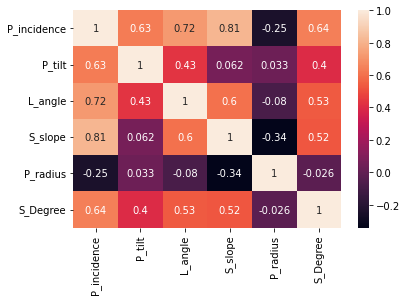

In [25]:
# Visualize a heatmap to understand correlation between all features

corr=df_type_combined[["P_incidence","P_tilt","L_angle","S_slope","P_radius","S_Degree"]].corr()
print(corr)
print()
sns.heatmap(corr,annot = True)
plt.show()

### B

A. Features having stronger correlation with correlation value.

Ans. 
1) P_incidence is strongly correlated with S_slope & L_angle. It is positively correlated with all features except P_radius
2) There is not a very strong correlation for P_tilt, P_radius and S_Degree with any of the features (i.e., correlation value<0.65)
3) There is no strong negative correlation among features. P_radius is negatively correlated with P_incidence and S_slope.

B. Features having weaker correlation with correlation value.

Ans.
1) P_tilt is very weakly correlated with S_slope, & P_radius.
2) L_angle has a very weak negative correlation with p_radius.

### C

In [26]:
# Visualize a pairplot with 3 classes distinguished by colors and share insights

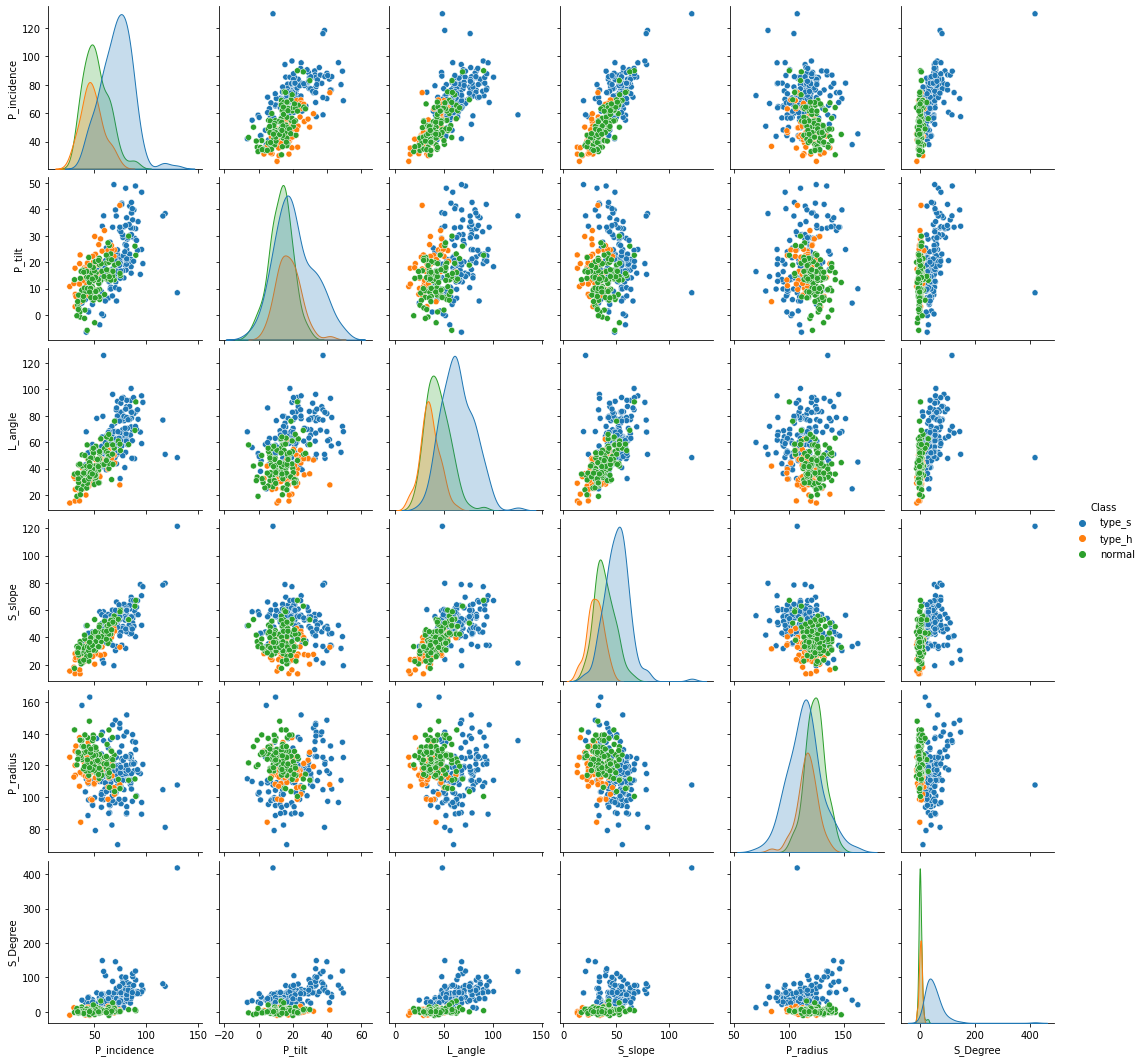

In [27]:
sns.pairplot(df_type_combined, hue='Class')
plt.show()

In [28]:
# TODO: Share Insights

### D

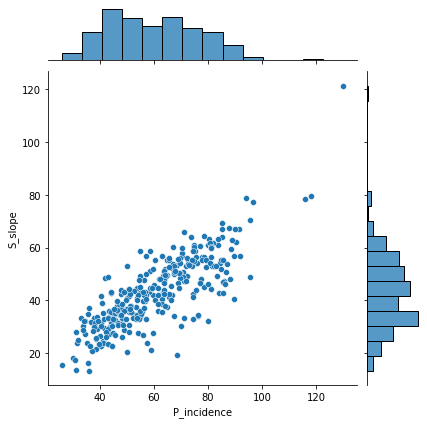

In [29]:
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights
sns.jointplot(df_type_combined, x='P_incidence',y='S_slope')
plt.show()

**Insights:**
The above jointplot shows that there is a strong linear positive correlation between P_incidence & S_slope feature. As one increases, the other increases as well.

### E

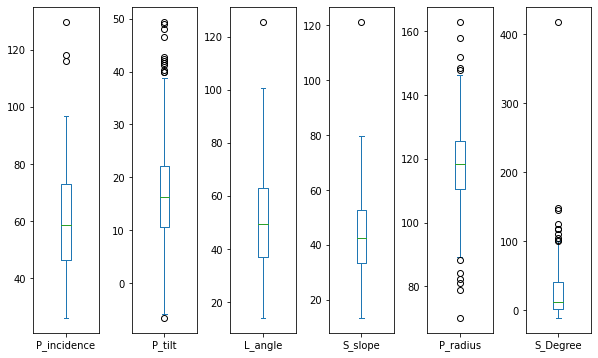

In [30]:
df_type_combined.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

**Insights**
1. All the features have a few outliers above the upper quartile.
2. Only P_radius have outlier below the lower quartile.
3. The data is scattered across various values from 20 to 400+. This data isn't normalised to a z scale or any other method.

## Q4

### A

In [31]:
X = df_type_combined.drop(labels= "Class" , axis = 1)
Y = df_type_combined["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972


### B

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### C

In [33]:
# Train a Supervised Learning Classification base model using KNN classifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [34]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### D

In [35]:
# Print all the possible performance metrics for both train and test data
# calculate accuracy measures and confusion matrix

# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

# ACCURACY SCORE
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7419354838709677

Confusion Matrix


<AxesSubplot:>

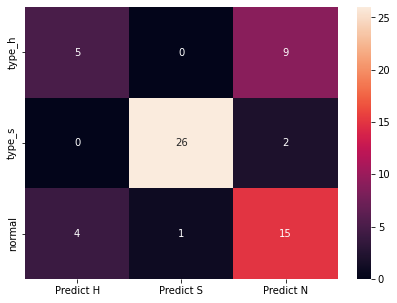

In [36]:
# CONFUSION MATRIX

from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["type_h", "type_s", "normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_h","type_s","normal"]],
                  columns = [i for i in ["Predict H","Predict S", "Predict N"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [37]:
#Checking performance our model with classification report.
# PRECISION RECALL F1-SCORE

print(classification_report(y_test, predicted_labels))
#Checking performance our model with ROC Score.
# roc_auc_score(y_test, predicted_labels)

              precision    recall  f1-score   support

      normal       0.58      0.75      0.65        20
      type_h       0.56      0.36      0.43        14
      type_s       0.96      0.93      0.95        28

    accuracy                           0.74        62
   macro avg       0.70      0.68      0.68        62
weighted avg       0.75      0.74      0.74        62



## Q5

### A

In [38]:
# Experiment with various parameters to improve performance of the base model

In [39]:
# Let's normalise the data and then again build the model

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled_train, XScaled_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.20, random_state=10)
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
NNH.fit(XScaled_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(XScaled_test, y_test)

0.8548387096774194

In [ ]:

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,31))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring='accuracy', verbose=1, return_train_score=True)

#Fit the model
best_model = clf.fit(XScaled_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 10 folds for each of 2940 candidates, totalling 29400 fits


In [ ]:
best_model.best_score_

In [ ]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled_train, XScaled_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.20, random_state=10)
knn_optimised = KNeighborsClassifier(n_neighbors=11,leaf_size=1,weights = 'distance')
knn_optimised.fit(XScaled_train,y_train)
y_pred=knn_optimised.predict(XScaled_test)
knn_optimised.score(XScaled_test, y_test)

In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

### B
Clearly showcase improvement in performance achieved

Ans.
1. Accuracy improved from 74.1 to Y
2. Precision improved from X to Y
3. 

### C

In [ ]:
# Clearly state which parameters contributed most to improve model performance

n_neighbours and leaf_size contributes most to improve model performance

# PART B

## Q1

### A

In [ ]:
df_data1=pd.read_csv('Data1.csv')
df_data2=pd.read_csv('Data2.csv')

### B

In [ ]:
print(df_data1.shape)
print(df_data2.shape)

In [ ]:
print(df_data1.columns)
print(df_data2.columns)

In [ ]:
print("Data Types for Data1")
print(df_data1.dtypes)
print()
print("Data Types for Data2")
print(df_data2.dtypes)

### C

In [ ]:
# Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
df_data1_data2 = df_data1.merge(df_data2, left_on='ID', right_on='ID')

In [ ]:
df_data1_data2.head()

### D

In [ ]:
cols_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore', 'LoanOnCard']
df_data1_data2[cols_to_convert] = df_data1_data2[cols_to_convert].astype(object)
df_data1_data2.dtypes

## Q2

### A

In [ ]:
df_data1_data2['LoanOnCard'].isnull().value_counts()

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize = (15,6))
sns.histplot(x='LoanOnCard', data=df_data1_data2, ax=ax,kde=True)

#### Insights

1) There are 4500 records with no loan, and 480 records who have taken a credit card loan. There are 20 Nan values
2) The feature is of int64 type as per the data

### B

In [ ]:
# Check the percentage of missing values and impute if required

df_data1_data2.isnull().mean().round(3).mul(100).sort_values(ascending=False)

- Only 'LoanOnCard' feature has missing values which account to 0.4% of the total values.

In [ ]:
## Impute missing values with most Frequent value since LoanOnCard is a categorical feature with 0/1 as possible values

imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(df_data1_data2[['LoanOnCard']])
df_data1_data2[['LoanOnCard']] = imputer.transform(df_data1_data2[['LoanOnCard']])
df_data1_data2.sample(10)

In [ ]:
df_data1_data2['LoanOnCard'].isnull().value_counts()

### C

In [ ]:
# Check for unexpected values in each categorical variable and impute with best suitable value

In [ ]:
df_data1_data2['HiddenScore'].value_counts()

In [ ]:
df_data1_data2['CreditCard'].value_counts()

In [ ]:
df_data1_data2['InternetBanking'].value_counts()

In [ ]:
df_data1_data2['FixedDepositAccount'].value_counts()

In [ ]:
df_data1_data2['Security'].value_counts()

In [ ]:
df_data1_data2['Level'].value_counts()

#### Insights
As there are no unexpected values, we don't need to replace anything.

## Q3

### A

In [ ]:
# Split data into X and Y
Xx = df_data1_data2.drop(labels=["ID", "ZipCode", "LoanOnCard"], axis=1)
Yy = df_data1_data2['LoanOnCard']

### B

In [ ]:
Yy = Yy.astype('int')

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size=0.25, random_state=5)

### C

In [ ]:
# Train a Supervised Learning Classification base model - Logistic Regression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(Xx_train, yy_train)
#predict on test
y_predict = model.predict(Xx_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

### D

In [ ]:
# Print evaluation metrics for the model and clearly share insights
model_score = model.score(Xx_test, yy_test)
print(model_score)


In [ ]:
cm=metrics.confusion_matrix(yy_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [ ]:
print(classification_report(yy_test, y_predict))

#### Insights
1. We got an accuracy of 95% for the test data which is pretty good.
2. We were able to predict X values correcgtly

### E 

In [ ]:
# Balance the data using the right balancing technique

In [ ]:
from sklearn.utils import resample

df_majority = df_data1_data2[df_data1_data2.LoanOnCard==0]
df_minority = df_data1_data2[df_data1_data2.LoanOnCard==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4520,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.LoanOnCard.value_counts()

### F

In [ ]:
# Split data into X and Y
Xx_upsampled = df_upsampled.drop(labels=["ID", "ZipCode", "LoanOnCard"], axis=1)
Yy_upsampled = df_upsampled['LoanOnCard']

In [ ]:
Yy_upsampled = Yy_upsampled.astype('int')
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx_upsampled, Yy_upsampled, test_size=0.25, random_state=5)

In [ ]:
# Train a Supervised Learning Classification base model - Logistic Regression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(Xx_train, yy_train)
#predict on test
y_predict = model.predict(Xx_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

### F

In [ ]:
# Print evaluation metrics and clearly share differences observed
model_score = model.score(Xx_test, yy_test)
print(model_score)

In [ ]:
cm=metrics.confusion_matrix(yy_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
print(classification_report(yy_test, y_predict))

#### Insights

1. The performance accuracy reduced from ~95 to ~89% after upsampling the data to balance target features.

## Q4

### A

In [ ]:
# Train a base model each for SVM, KNN

#### SVM

In [ ]:
# Split original data into X and Y

Xx = df_data1_data2.drop(labels=["ID", "ZipCode", "LoanOnCard"], axis=1)
Yy = df_data1_data2['LoanOnCard']

Yy = Yy.astype('int')
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size=0.25, random_state=5)


In [ ]:

clf = svm.SVC(gamma=0.025, C=3)    
clf.fit(Xx_train , yy_train)
y_pred_svm = clf.predict(Xx_test)
print(accuracy_score(yy_test,y_pred_svm))

y_grid = (np.column_stack([yy_test, y_pred_svm]))
print(y_grid)
np.savetxt("ocr.csv", y_grid , fmt='%s')

In [ ]:
import string
lab= list(string.ascii_uppercase[0:26])
plab=["Pr "+s for s in lab]

In [ ]:
cm=metrics.confusion_matrix(yy_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])

sns.heatmap(df_cm, annot=True ,fmt='g');

#### KNN

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
NNH.fit(Xx_train, yy_train)

In [ ]:
# ACCURACY SCORE
predicted_labels = NNH.predict(Xx_test)
NNH.a(Xx_test, yy_test)

### B

In [ ]:
# #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,31))
# p=[1,2]

# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring='accuracy', verbose=1, return_train_score=True)

# #Fit the model
# best_model = clf.fit(Xx_train,yy_train)

# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [ ]:
from sklearn import svm

In [ ]:
# clf = svm.SVC(gamma=0.025, C=3)    

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(Xx_train, yy_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(Xx_test)

### D

In [ ]:
# print classification report
print(classification_report(yy_test, grid_predictions))

In [ ]:
cm=metrics.confusion_matrix(yy_test, grid_predictions, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])

sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
print(accuracy_score(yy_test,grid_predictions))

### E

#### Share improvement achieved from base model to final model
Ans. The accuracy score improved from 90.4% to 96.48% after doing hyperparameterisation tuning. 
I used the GridCV search to determine the best fits for the model which imroved the accuracy.